# scikit_learn

### Using sklearn's linear_model.LinearRegression

In [22]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

In [23]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
lags = 3
m = np.zeros((lags + 1, len(x) - lags))
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
for i in range(lags + 1):
    m[i] = x[i : (len(x) - lags + i)]
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [5]:
from sklearn import linear_model

In [6]:
lm = linear_model.LinearRegression()
lm.fit(m[:lags].T, m[lags])

LinearRegression()

In [7]:
lm.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [8]:
lm.intercept_

2.0000000000000018

In [10]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Set fit_intercept to False, then sklearn.linear_model is the same as np.polyfit()

In [11]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(m[:lags].T, m[lags])

LinearRegression(fit_intercept=False)

In [12]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [13]:
lm.intercept_

0.0

In [14]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

#### Note: this above example input is not full rank, thus do not have a unique solution, i.e. can have multiple solutions with and without intercept.

# A simple classification problem

### Using sklearn's linear_model.LogisticRegression

In [17]:

hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1])

(-0.2, 1.2)

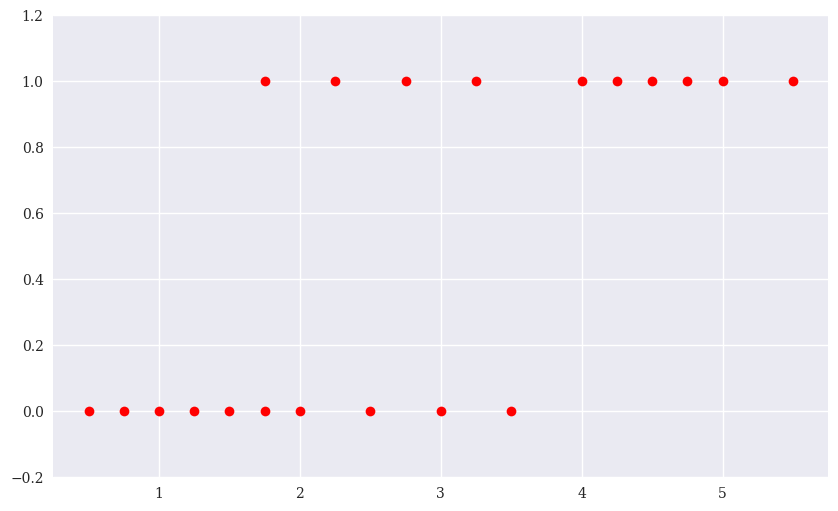

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2)

In [37]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [41]:
# Reshape the one-dimemsional ndarry into a two-dim required by scikit-learn
hrs = hours.reshape(1, -1).T
lm.fit(hrs, success)

LogisticRegression()

(-0.2, 1.2)

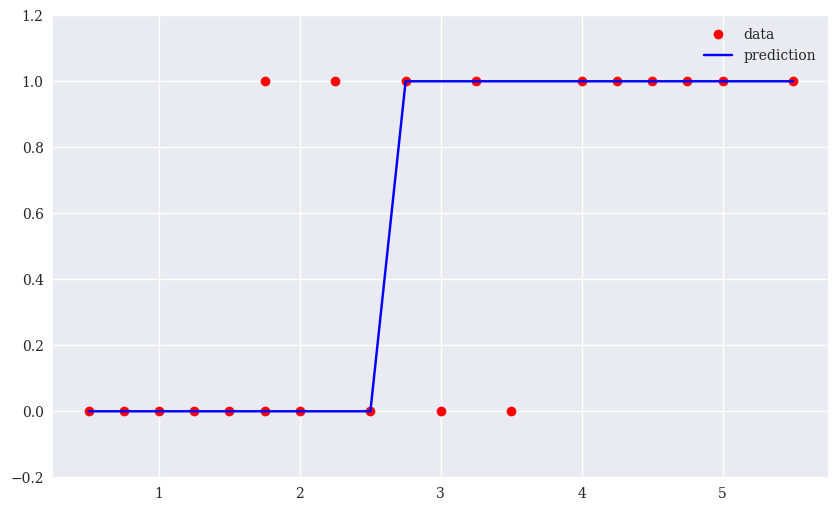

In [42]:
prediction = lm.predict(hrs)
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2)

### Plot probability instead of classification result

In [43]:
prob = lm.predict_proba(hrs)

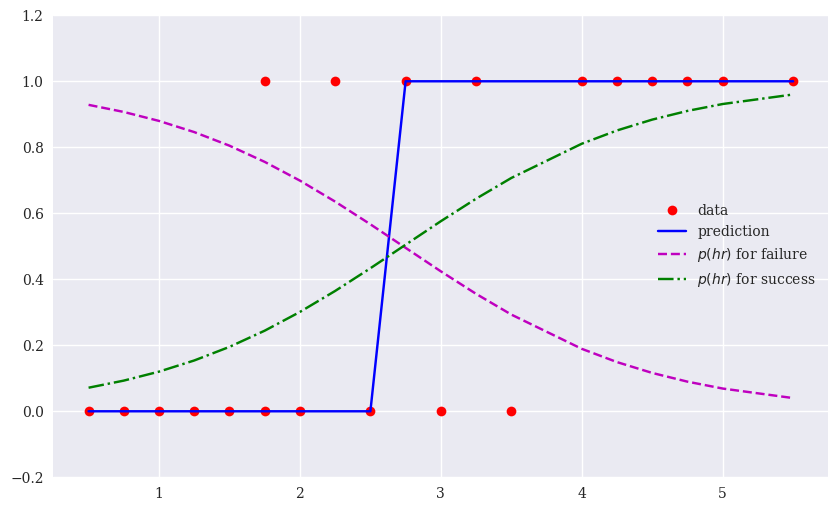

In [48]:
prediction = lm.predict(hrs)
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.plot(hours, prob.T[0], 'm--', label='$p(hr)$ for failure')
plt.plot(hours, prob.T[1], 'g-.', label='$p(hr)$ for success')
plt.ylim(-0.2, 1.2)
plt.legend(loc=0)

# Using sklearn's LogisticRegression to predict market direction

In [49]:
import pandas as pd
raw = pd.read_csv('../data/pyalgo_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [52]:
symbol = 'GLD'
data = pd.DataFrame(raw[symbol])
data.rename(columns={symbol: 'price'}, inplace=True)
data['return'] = np.log(data['price'] / data['price'].shift(1))
data.dropna(inplace=True)
lags = 3
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)
data.head()

,price,return,lag_1,lag_2,lag_3
Date,,,,,
2010-01-08,111.37,0.004951,-0.006207,0.016365,-0.000911
2010-01-11,112.85,0.013202,0.004951,-0.006207,0.016365
2010-01-12,110.49,-0.021134,0.013202,0.004951,-0.006207
2010-01-13,111.54,0.009458,-0.021134,0.013202,0.004951
2010-01-14,112.03,0.004383,0.009458,-0.021134,0.013202


In [55]:
from sklearn.metrics import accuracy_score
# Use a C value that gives less weight to the regularization term
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000)

In [57]:
# Use the sign of returns as the target
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [60]:
data['prediction'] = lm.predict(data[cols])
data['prediction'].value_counts()

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [62]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()
hits

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [63]:
accuracy_score(data['prediction'],
               np.sign(data['return']))

0.5338375796178344

In [65]:
data['strategy'] = data['prediction'] * data['return']
data[['return', 'strategy']].sum().apply(np.exp)

return      1.289478
strategy    2.458716
dtype: float64

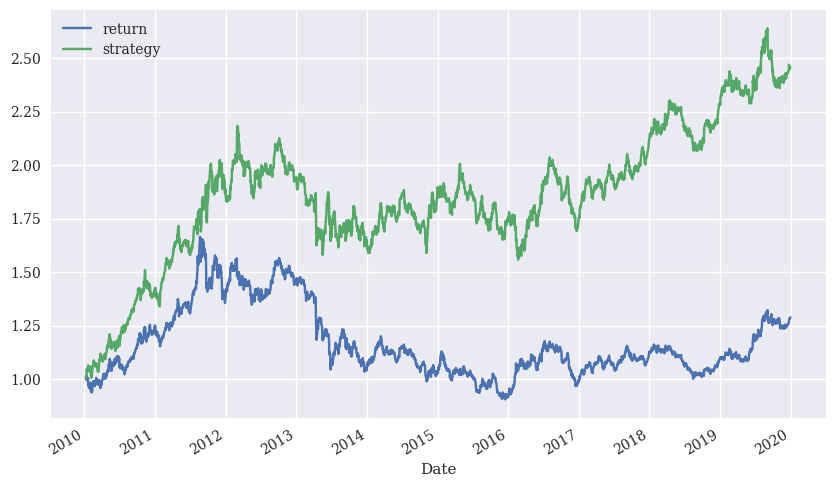

In [66]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));